<a href="https://colab.research.google.com/github/SughoshDixit/Diabetes-Dataset-using-Naive-Bayes-Classifier/blob/main/Group137_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><center style="color:#159364; font-family:cursive;">
 <table>
  <tr>
    <th>Name</th>
    <th>Student No</th>
  </tr>
  <tr>
    <td>Sughosh P Dixit</td>
    <td>2021FA04058</td>
  </tr>
</table> 
</p>
***
**Diabetes Dataset:**

**Diabetes Dataset**

**Part A**
1. Import Libraries/Dataset
    1. Download the dataset
    2. Import the required libraries
2. Data Visualization and Exploration [1M]
    1. Print 2 rows for sanity check to identify all the features present in  the dataset and if the target matches with them.
    2. Print the description and Basic statistical details.
    3. Print each class label count (Activity) and create a pie chart for each class (% of data distribution). Write your observation on data balancing.
    4. Plot Activities by Subject/Participants and Provide appropriate comments on
visualized data.
    5. Try exploring the data and see what insights can be drawn from the dataset.
3. Data Pre-processing and cleaning [2M]
    1. Do the appropriate preprocessing steps
    1. Identify NULL or Missing Values based on column. Apply appropriate feature
engineering techniques for them.
    2. Use MinMax normalization for feature transformation.
    3. Do the correlational analysis on the dataset. Provide a visualization for the same.
    
**Part B**
1. Model Building [5M]
1. Perform Model Development using Naïve Bayes with appropriate hyper parameters.
2. Train the model and print the training accuracy, Recall, F1 Score for case 1, case 2 separately. 
3. Deep Learning Models are strictly not allowed. 

2. Performance Evaluation [2M] 
    1. Do the prediction for the test data and display the results for the inference. 
    2. Print test Accuracy, Recall, F1 Score for case 1 and case 2 separately.
    3. Print the confusion matrix for all cases. Provide insights on the most suitable matrix in this case.
    4. Compare the accuracy of train data with test data. Provide appropriate analysis for the same for all cases.
    5. Write your observation for result of each question and justify your answer.

# Part A

Import the required libraries

In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/content/diabetes.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Importing dataset
dataset = pd.read_csv('/content/diabetes.csv')

Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
dataset.head(2) #Printing the first two rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Print the description and Basic statistical details.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Inference*** *Outcome column infers whether the indiviual is Diabetic or not. Rest all of the columns are numeric.* 

Print each class label count (Activity) and create a pie chart for each class (% of data distribution). Write your observation on data balancing.

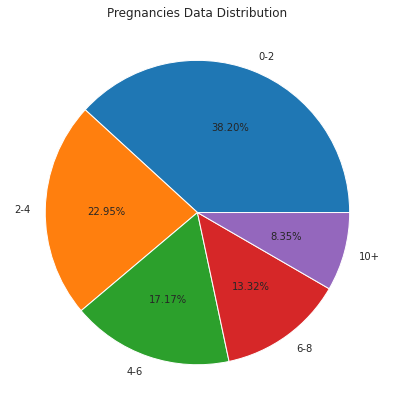

Count of Pregnancies
 0-2    238
2-4    143
4-6    107
6-8     83
10+     52
Name: bins, dtype: int64


In [ ]:
#Pregnancies Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['Pregnancies'],bins=[0,2,4,6,8,10], labels=["0-2","2-4","4-6","6-8","10+"])
count = df['bins'].value_counts()
_per_counts_preg = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_preg.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_preg, labels = labs, autopct = "%.2f%%" )
plt.title('Pregnancies Data Distribution')
plt.show()
print('Count of Pregnancies\n',count)

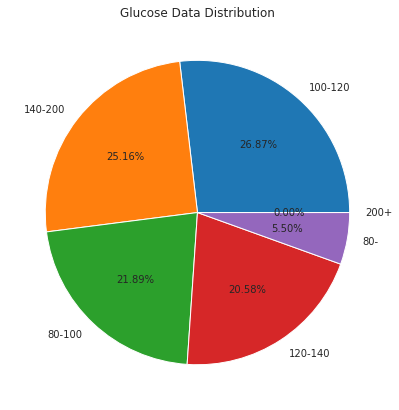

Count of Glucose levels
 100-120    205
140-200    192
80-100     167
120-140    157
80-         42
200+         0
Name: bins, dtype: int64


In [ ]:
#Glucose Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['Glucose'],bins=[0,80,100,120,140,200,300], labels=["80-","80-100","100-120","120-140","140-200","200+"])
count = df['bins'].value_counts()
_per_counts_gluc = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_gluc.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_gluc, labels = labs, autopct = "%.2f%%" )
plt.title('Glucose Data Distribution')
plt.show()
print('Count of Glucose levels\n',count)

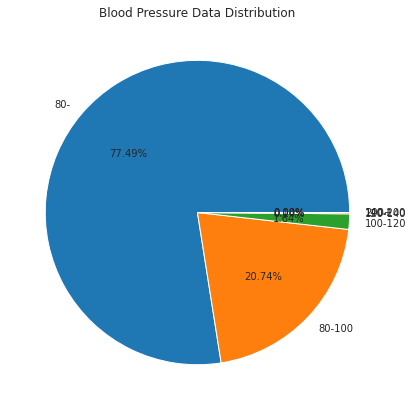

Count of Blood Pressure levels
 80-        568
80-100     152
100-120     12
120-140      1
140-200      0
200+         0
Name: bins, dtype: int64


In [ ]:
#Blood Pressure Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['BloodPressure'],bins=[0,80,100,120,140,200,300], labels=["80-","80-100","100-120","120-140","140-200","200+"])
count = df['bins'].value_counts()
_per_counts_bp = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_bp.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_bp, labels = labs, autopct = "%.2f%%" )
plt.title('Blood Pressure Data Distribution')
plt.show()
print('Count of Blood Pressure levels\n',count)

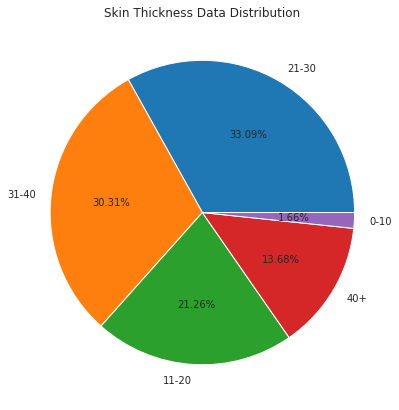

Count of Skin Thickness
 21-30    179
31-40    164
11-20    115
40+       74
0-10       9
Name: bins, dtype: int64


In [ ]:
#Skin Thickness Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['SkinThickness'],bins=[0,10,20,30,40,500], labels=["0-10","11-20","21-30","31-40","40+"])
count = df['bins'].value_counts()
_per_counts_sk = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_sk.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_sk, labels = labs, autopct = "%.2f%%" )
plt.title('Skin Thickness Data Distribution')
plt.show()
print('Count of Skin Thickness\n',count)

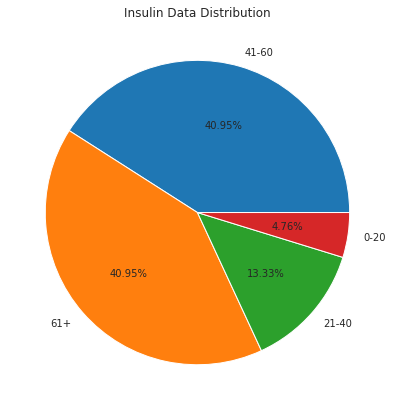

Count of Insulin Range
 41-60    43
61+      43
21-40    14
0-20      5
Name: bins, dtype: int64


In [ ]:
#Insulin Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['Insulin'],bins=[0,20,40,60,80], labels=["0-20","21-40","41-60","61+"])
count = df['bins'].value_counts()
_per_counts_in = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_in.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_in, labels = labs, autopct = "%.2f%%" )
plt.title('Insulin Data Distribution')
plt.show()
print('Count of Insulin Range\n',count)

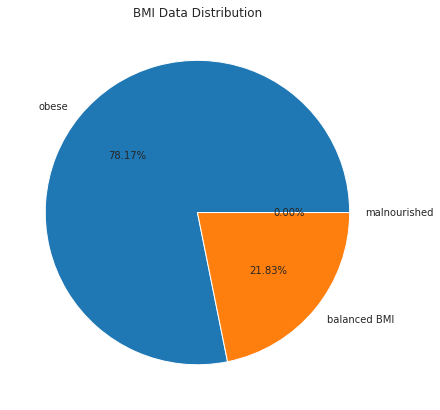

Count of BMI Group
 obese           401
balanced BMI    112
malnourished      0
Name: bins, dtype: int64


In [ ]:
#BMI Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['BMI'],bins=[0,18,25,35], labels=["malnourished","balanced BMI","obese"])
count = df['bins'].value_counts()
_per_counts_bmi = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_bmi.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_bmi, labels = labs, autopct = "%.2f%%" )
plt.title('BMI Data Distribution')
plt.show()
print('Count of BMI Group\n',count)

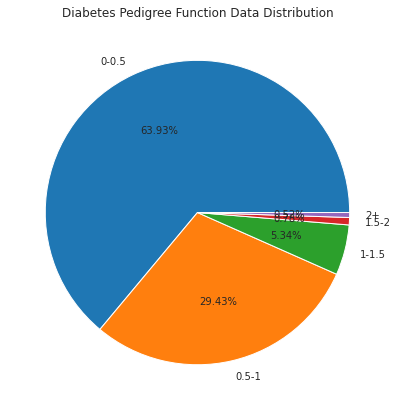

Count of Diabetes Pedigree Function Group
 0-0.5    491
0.5-1    226
1-1.5     41
1.5-2      6
2+         4
Name: bins, dtype: int64


In [ ]:
#Diabetes Pedigree Function Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['DiabetesPedigreeFunction'],bins=[0,0.5,1,1.5,2,3], labels=["0-0.5","0.5-1","1-1.5","1.5-2","2+"])
count = df['bins'].value_counts()
_per_counts_dpf = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_dpf.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_dpf, labels = labs, autopct = "%.2f%%" )
plt.title('Diabetes Pedigree Function Data Distribution')
plt.show()
print('Count of Diabetes Pedigree Function Group\n',count)

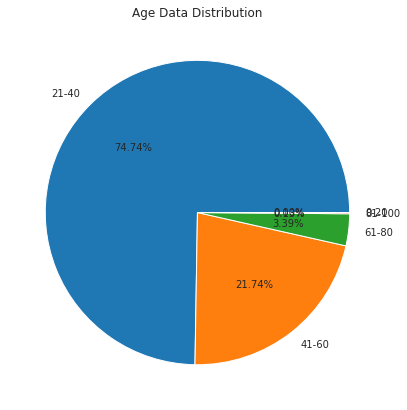

Count of Age Group
 21-40     574
41-60     167
61-80      26
81-100      1
0-20        0
Name: bins, dtype: int64


In [ ]:
#Age Data Distribution
df = pd.DataFrame(dataset)
df['bins'] = pd.cut(df['Age'],bins=[0,20,40,60,80,100], labels=["0-20","21-40","41-60","61-80","81-100"])
count = df['bins'].value_counts()
_per_counts_age = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_age.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_age, labels = labs, autopct = "%.2f%%" )
plt.title('Age Data Distribution')
plt.show()
print('Count of Age Group\n',count)

***Observation:*** *From looking at the above Pie Charts we can clearly see that except for Pregnancies and Outcome all the other attributes have continuous data distribution when compared to Pregnancies which have discrete values. In the data set, data balancing can completely depend on the range at which data is visualized.*

Plot Activities by Subject/Participants and Provide appropriate comments on visualized data.

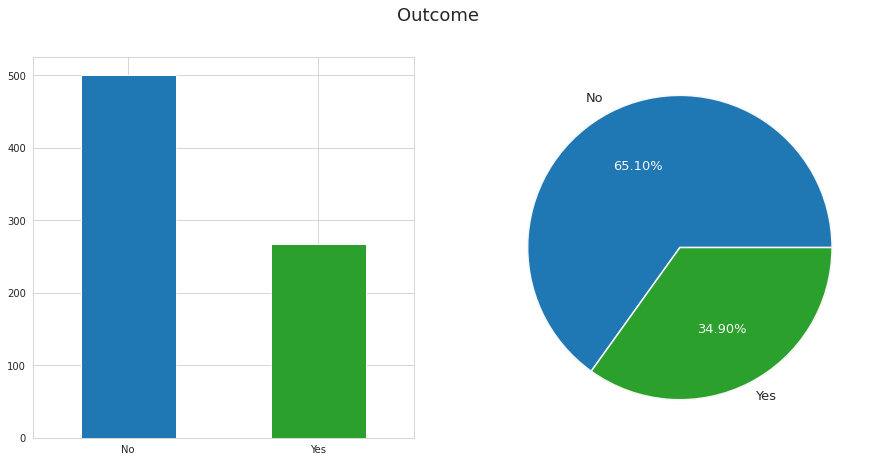

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Outcome", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

When viewed in overall, on the Outcome data from the dataset, we have a total of 34.90% are said to be Diabetic and 65.10% are said to be non-Diabetic. We can infer that the machine learning model can be biased due to the data imbalance when looked at the number of 'No' values compared to the numbe of 'Yes' values in the Outcome attribute.

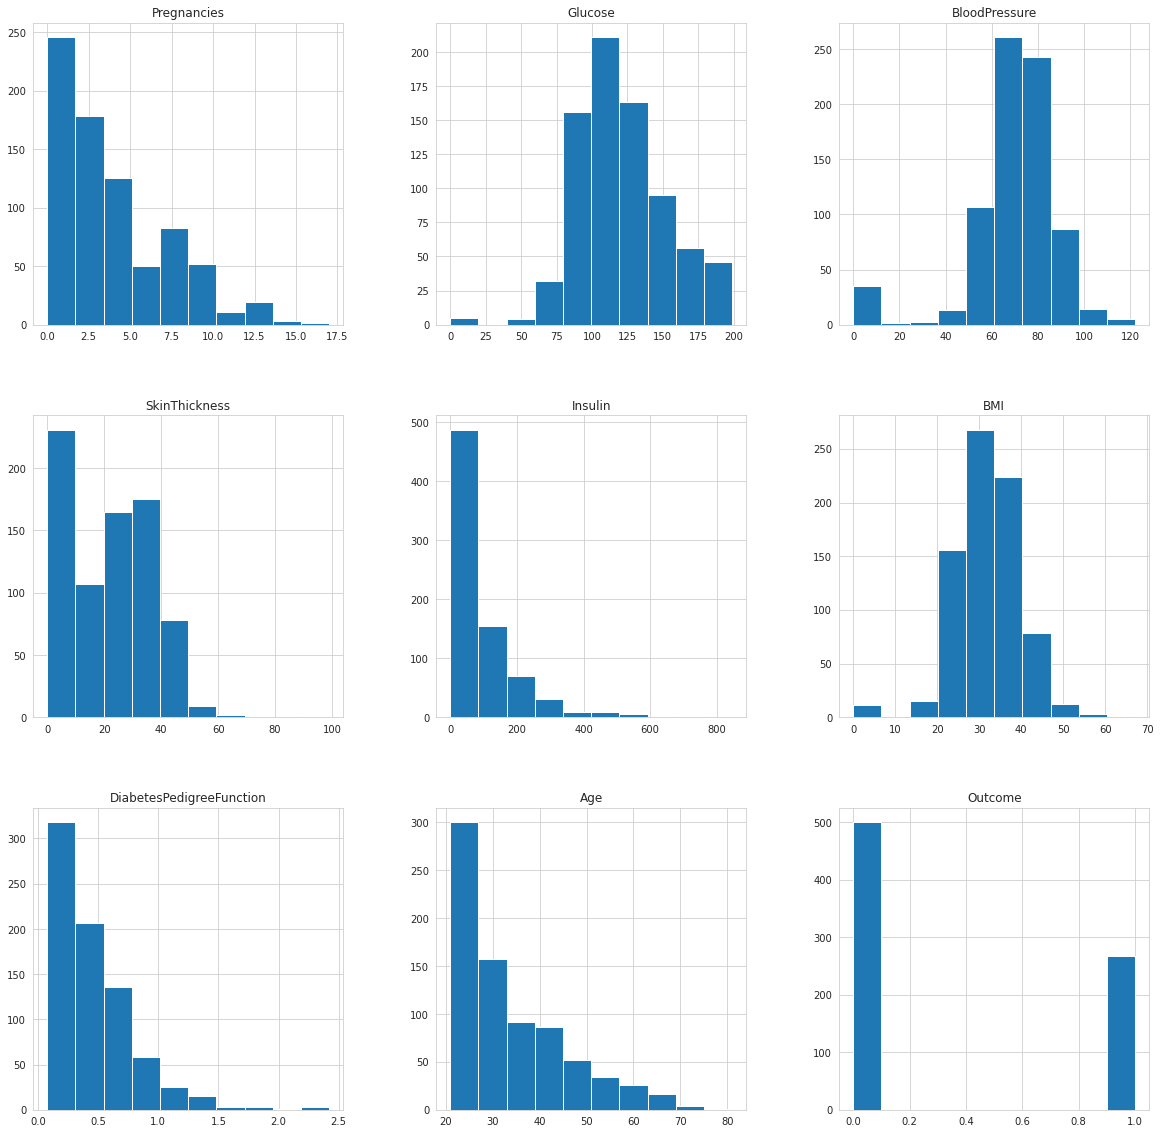

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(20,20))
plt.show()

**Observation:**  *We observe that only glucose and Blood Pressure are normally distributed rest other attributes are skewed(distorted) and have outliers*

Try exploring the data and see what insights can be drawn from the dataset.

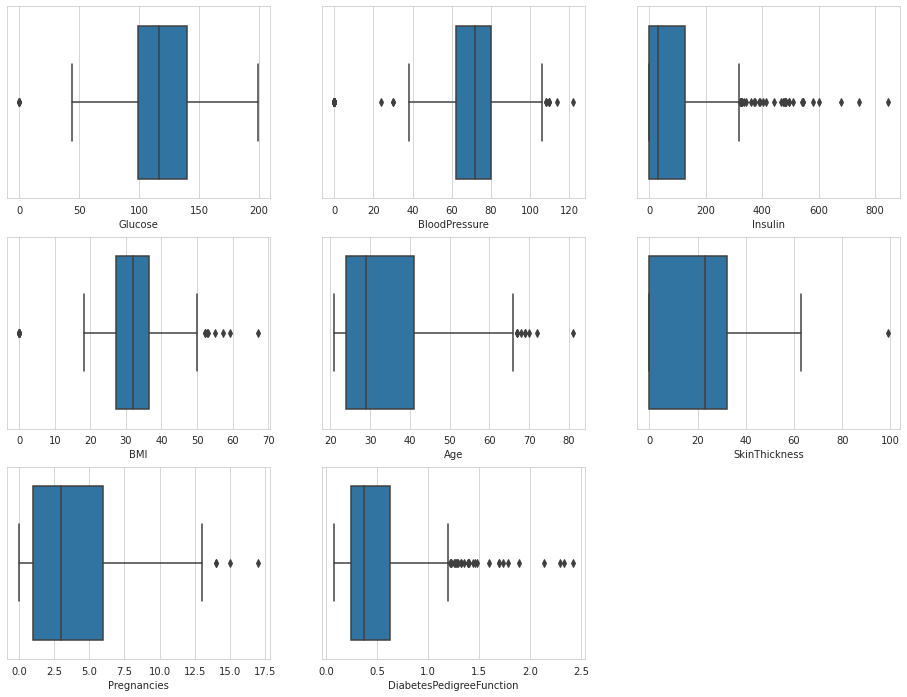

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Observation: *From the above graph we can observe that except Glucose and Skin Thickness attributes who have minimal number of outliers all the other attributes have considerable number of outliers which must be dealt with.*

**Correlation Analysis before Cleaning**

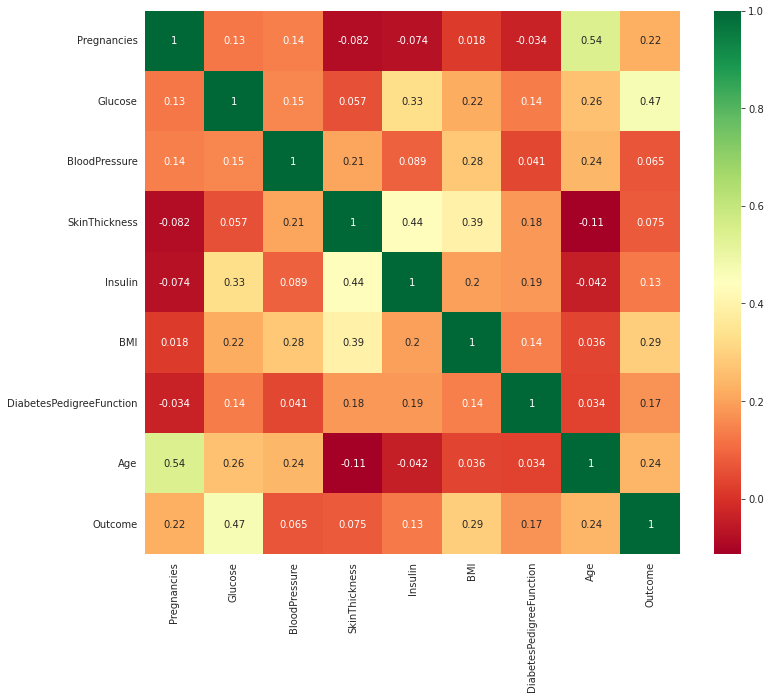

In [ ]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has ver

5. Try exploring the data and see what insights can be drawn from the dataset.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
bins                        0
dtype: int64

**Observation**: *From the above code we can infer that there are no missing or nan values in the provided dataset. But there are values equal to 0 which can be considered as null values in disguise.*

**Data Pre-processing and cleaning**

Do the appropriate preprocessing steps
Identify NULL or Missing Values based on column. Apply appropriate feature engineering techniques for them.

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
df = pd.DataFrame(dataset)
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [ ]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


Making all the values equal to 0 as null

In [ ]:
nonzero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[nonzero] = df[nonzero].replace(0,np.nan)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Identifying the number of Outliers and number of null values.

In [ ]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Total Number of outliers")
print(((df < lower) + (df > upper)).sum(),end="\n\n")

print("Null values")
print(df.isnull().sum())

Total Number of outliers
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

Null values
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Observation:** *Columns Glucose does not have an outlier due to which we can fill it with the mean whereas the other columns have outliers hence median is taken to fill null values.*

In [ ]:
#filling Nan in Glucose with mean beacuse it don't have outliers
df["Glucose"]=df["Glucose"].fillna(df["Glucose"].mean())

fillnan_median=["BloodPressure","SkinThickness","Insulin","BMI"]

for i in fillnan_median:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Do the correlational analysis on the dataset. Provide a visualization for the same.

In [ ]:
df.corrwith(df["Outcome"]).drop("Outcome")

Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.165723
SkinThickness               0.214873
Insulin                     0.203790
BMI                         0.312038
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

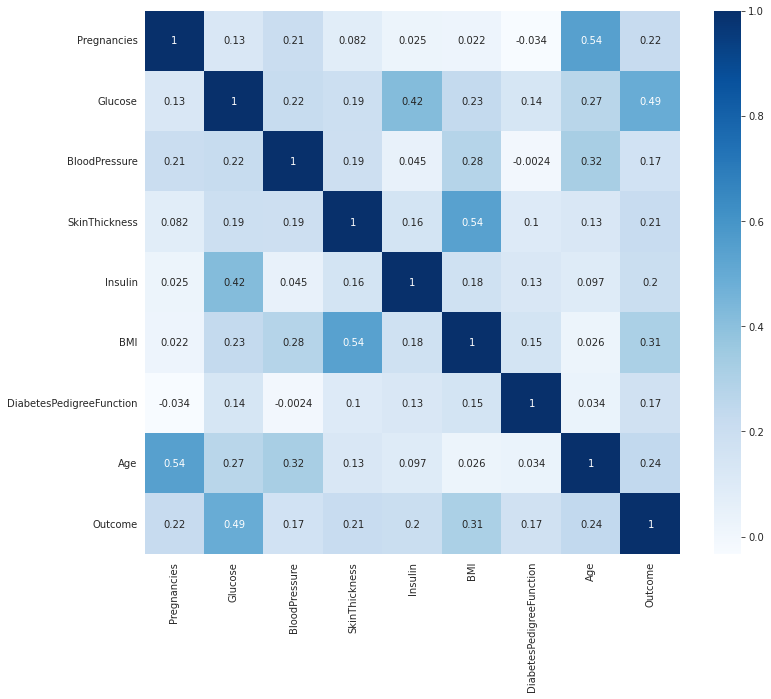

In [ ]:
# Correlation between all the features after cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='Blues')  # seaborn has ver

2. Use MinMax normalization for feature transformation.

In [ ]:
x=df.iloc[:,:-1]
y=df["Outcome"]

**Sampling:** The Imbalanced classification problem is what we face when there is a severe skew in the class distribution of our training data. Okay, the skew may not be extremely severe (it can vary), but the reason we identify imbalanced classification as a problem is because it can influence the performance on our Machine Learning algorithms. An approach to combat this challenge is Random Sampling.

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

scale=MinMaxScaler()
scaled_data=scale.fit_transform(x)

Train and Test data splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

**Significance of Random State:** random_state is basically used for reproducing the problem the same every time it is run. If we do not use a random_state in train_test_split, every time we make the split we might get a different set of train and test data points and will not help us in debugging in case we get an issue.

# Part B

**Model Building:** Naive Bayes Classifier

Naïve Bayes Classifier is a probabilistic classifier and is based on Bayes Theorem. Given a new data point, we try to classify which class label this new data instance belongs to. The prior knowledge about the past data helps us in classifying the new data point. Below is the Formula of Bayes Theorem, based on which Bayes Classifer works

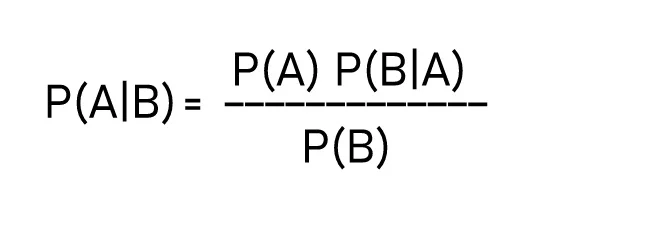

1. Perform Model Development using Naïve Bayes with appropriate hyper parameters.

In [ ]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))
x_train.columns = cols
x_test.columns = cols
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,80.000000,55.0,29.000000,125.000000,19.100000,0.258000,21.0
1,2.0,120.000000,76.0,37.000000,105.000000,39.700000,0.215000,29.0
2,3.0,120.000000,70.0,30.000000,135.000000,42.900000,0.452000,30.0
3,5.0,134.110146,70.0,23.330438,129.724635,35.168694,0.577247,28.0
4,2.0,100.000000,64.0,23.000000,125.000000,29.700000,0.368000,21.0


There are 3 types in which Bayes Classifier can be implemented:

*   Multinomial – It is used for Discrete Counts. The one we described in the example above is an example of Multinomial Type Naïve Bayes.
*   Gaussian – This type of Naïve Bayes classifier assumes the data to follow a Normal Distribution
*   Bernoulli – This type of Classifier is useful when our feature vectors are Binary.





Note: We will be implementing all the three classifiers and making the respective observations. 🤓

3. Train the model and print the training accuracy, Recall, F1 Score for case 1, case 2 separately.

**Case 1:** 

**Multinomial Naive Bayes Classifier**


**Predicting Train and Test Accuracy**

In [ ]:
Naive_bayes = MultinomialNB()
predict_train = Naive_bayes.fit(x_train, y_train).predict(x_train)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
# predict the target on the test dataset
predict_test = Naive_bayes.predict(x_test)
# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.6114285714285714
accuracy_score on test dataset :  0.6333333333333333


In [ ]:
print('Classification of Train Data :\n ',classification_report(y_train,predict_train))
print('Classification of Test Data :\n ',classification_report(y_test,predict_test))

Classification of Train Data :
                precision    recall  f1-score   support

           0       0.60      0.73      0.66       356
           1       0.64      0.49      0.55       344

    accuracy                           0.61       700
   macro avg       0.62      0.61      0.60       700
weighted avg       0.62      0.61      0.61       700

Classification of Test Data :
                precision    recall  f1-score   support

           0       0.59      0.75      0.66       144
           1       0.69      0.53      0.60       156

    accuracy                           0.63       300
   macro avg       0.64      0.64      0.63       300
weighted avg       0.65      0.63      0.63       300



Confusion Matrix for Test Data

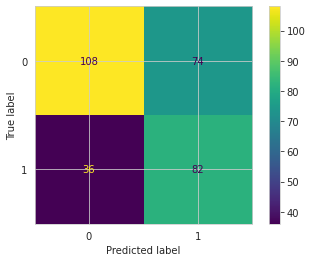

In [ ]:
cm=confusion_matrix(predict_test,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Case 2**

**Gaussian Naive Bayes Classifier**

**Predicting Train and Test Accuracy**

In [ ]:
Naive_bayes = GaussianNB()
predict_train = Naive_bayes.fit(x_train, y_train).predict(x_train)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
# predict the target on the test dataset
predict_test = Naive_bayes.predict(x_test)
# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.7371428571428571
accuracy_score on test dataset :  0.7066666666666667


In [ ]:
print('Classification of Train Data :\n ',classification_report(y_train,predict_train))
print('Classification of Test Data :\n ',classification_report(y_test,predict_test))

Classification of Train Data :
                precision    recall  f1-score   support

           0       0.73      0.78      0.75       356
           1       0.75      0.69      0.72       344

    accuracy                           0.74       700
   macro avg       0.74      0.74      0.74       700
weighted avg       0.74      0.74      0.74       700

Classification of Test Data :
                precision    recall  f1-score   support

           0       0.67      0.78      0.72       144
           1       0.76      0.64      0.69       156

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



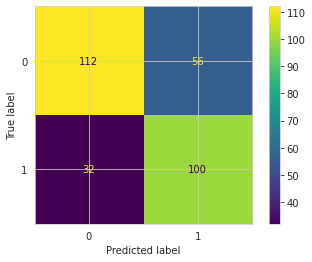

In [ ]:
cm=confusion_matrix(predict_test,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Case 3**

**Bernoulli Naive Bayes Classifier**

**Predicting Train and Test Accuracy**

In [ ]:
Naive_bayes = BernoulliNB()
predict_train = Naive_bayes.fit(x_train, y_train).predict(x_train)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
# predict the target on the test dataset
predict_test = Naive_bayes.predict(x_test)
# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.5085714285714286
accuracy_score on test dataset :  0.48


In [ ]:
print('Classification of Train Data :\n ',classification_report(y_train,predict_train))
print('Classification of Test Data :\n ',classification_report(y_test,predict_test))

Classification of Train Data :
                precision    recall  f1-score   support

           0       0.51      1.00      0.67       356
           1       0.00      0.00      0.00       344

    accuracy                           0.51       700
   macro avg       0.25      0.50      0.34       700
weighted avg       0.26      0.51      0.34       700

Classification of Test Data :
                precision    recall  f1-score   support

           0       0.48      1.00      0.65       144
           1       0.00      0.00      0.00       156

    accuracy                           0.48       300
   macro avg       0.24      0.50      0.32       300
weighted avg       0.23      0.48      0.31       300



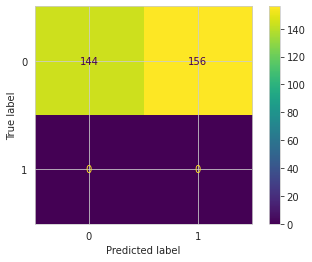

In [ ]:
cm=confusion_matrix(predict_test,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

***Observation:*** 
1. From the above 3 enlisted models we can clearly see that Guassian Naive Bayes has the best accuracy score amongst the three.
2. It can also be observed that the accuracy score of training dataset is greater than accuracy score of test dataset.
3. The Naive Bayes classifier is a quick, accurate, and trustworthy method, especially on large datasets.
4. Th e hyperparamaters can be tuned using RepeatedStratifiedKFold sampling of data and data transformed using PowerTransformer. 


Below is the implementation of Hyper parameters tuning.

In [ ]:
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
model = GaussianNB()
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [ ]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7533333333333333


**Observation: ** From the above Hyperparameter tuning that has been showcased, we can clearly showcase how a Naive Bayesian Classifier's accuracy can be increased. In the above case the accuracy has been increased from **70.5% ** using Random Sampling to **75%** accuracy using Repeated Startified KFold sampling where we can find 1500 folds done on the oupput depending on the size of the data.